# Spotify Music Popularity Capstone - Pre-processing and Training Data Development

Greg Welliver   

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as plticker
import seaborn as sns
sns.set()
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
import warnings
from scipy import stats

In [2]:
# load the dataframe
df = pd.read_csv("../Data/Merged_Data7.csv", index_col=[0])
df.head()

,track_id,track_name,track_genre,artist_name,track_popularity,popular_year,Top100,key,acousticness,danceability,...,modality,speechiness,tempo,time_signature,valence,second_artist,artist_country,collaboration,prevTop100,Label
0,3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady,hip-hop,Eminem,88.0,2000,Y,5.0,0.0302,0.949,...,0.0,0.0572,104.504,4.0,0.760,NaN,United States,N,N,"Aftermath, Interscope, Shady"
12,0I3q5fE6wg7LIfHGngUTnV,Ms. Jackson,hip-hop,Outkast,82.0,2001,Y,4.0,0.1430,0.843,...,0.0,0.2690,94.948,4.0,0.613,NaN,NaN,N,N,NaN
13,3UmaczJpikHgJFyBTAJVoz,Stan,hip-hop,Eminem,85.0,2001,Y,6.0,0.0371,0.780,...,0.0,0.2380,80.063,4.0,0.507,NaN,United States,N,N,"Aftermath, Interscope, Shady"
25,3Gf5nttwcX9aaSQXRWidEZ,Ride Wit Me,hip-hop,Nelly,75.0,2001,Y,7.0,0.0616,0.850,...,1.0,0.0478,101.875,4.0,0.722,NaN,United States,N,N,Universal Motown
31,6glsMWIMIxQ4BedzLqGVi4,"So Fresh, So Clean",hip-hop,Outkast,72.0,0,N,5.0,0.0281,0.725,...,0.0,0.3320,166.028,3.0,0.915,NaN,NaN,N,N,NaN


In [3]:
df = df.reset_index(drop=True)

In [4]:
df.shape

(255096, 25)

In [5]:
df.dtypes

track_id             object
track_name           object
track_genre          object
artist_name          object
track_popularity    float64
popular_year          int64
Top100               object
key                 float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
modality            float64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
second_artist        object
artist_country       object
collaboration        object
prevTop100           object
Label                object
dtype: object

## Let's do some additional cleaning before we go further

In [6]:
# remove columns that won't have any predictive value: track_id, track_name
# remove track_popularity since this will most likely be highly correlated to dependent variable
# remove second_artist since we created "collaboration" with that column
# remove prevTop100 until can figure out how to correctly create that
df = df.drop(['track_id', 'track_name', 'prevTop100', 'track_popularity', 'second_artist', 'popular_year'], axis=1)

In [7]:
df.head()

,track_genre,artist_name,Top100,key,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,modality,speechiness,tempo,time_signature,valence,artist_country,collaboration,Label
0,hip-hop,Eminem,Y,5.0,0.0302,0.949,284200.0,0.661,0.000000,0.0454,-4.244,0.0,0.0572,104.504,4.0,0.760,United States,N,"Aftermath, Interscope, Shady"
1,hip-hop,Outkast,Y,4.0,0.1430,0.843,270507.0,0.806,0.000000,0.0771,-5.946,0.0,0.2690,94.948,4.0,0.613,NaN,N,NaN
2,hip-hop,Eminem,Y,6.0,0.0371,0.780,404107.0,0.768,0.000002,0.5180,-4.325,0.0,0.2380,80.063,4.0,0.507,United States,N,"Aftermath, Interscope, Shady"
3,hip-hop,Nelly,Y,7.0,0.0616,0.850,291782.0,0.700,0.000002,0.2440,-6.490,1.0,0.0478,101.875,4.0,0.722,United States,N,Universal Motown
4,hip-hop,Outkast,N,5.0,0.0281,0.725,240027.0,0.640,0.000000,0.0990,-7.905,0.0,0.3320,166.028,3.0,0.915,NaN,N,NaN


In [8]:
# check number of unique value counts in each column to check if they are categorical, in addition to object type above
df.nunique()

track_genre            15
artist_name         22772
Top100                  2
key                    12
acousticness         5032
danceability         1314
duration_ms         84943
energy               2729
instrumentalness     5401
liveness             1753
loudness            30094
modality                2
speechiness          1545
tempo               89703
time_signature          5
valence              1710
artist_country        131
collaboration           2
Label                2087
dtype: int64

In [9]:
#df.key.value_counts()

In [10]:
#df.modality.value_counts()

In [11]:
#df.time_signature.value_counts()

In [12]:
df.head()

,track_genre,artist_name,Top100,key,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,modality,speechiness,tempo,time_signature,valence,artist_country,collaboration,Label
0,hip-hop,Eminem,Y,5.0,0.0302,0.949,284200.0,0.661,0.000000,0.0454,-4.244,0.0,0.0572,104.504,4.0,0.760,United States,N,"Aftermath, Interscope, Shady"
1,hip-hop,Outkast,Y,4.0,0.1430,0.843,270507.0,0.806,0.000000,0.0771,-5.946,0.0,0.2690,94.948,4.0,0.613,NaN,N,NaN
2,hip-hop,Eminem,Y,6.0,0.0371,0.780,404107.0,0.768,0.000002,0.5180,-4.325,0.0,0.2380,80.063,4.0,0.507,United States,N,"Aftermath, Interscope, Shady"
3,hip-hop,Nelly,Y,7.0,0.0616,0.850,291782.0,0.700,0.000002,0.2440,-6.490,1.0,0.0478,101.875,4.0,0.722,United States,N,Universal Motown
4,hip-hop,Outkast,N,5.0,0.0281,0.725,240027.0,0.640,0.000000,0.0990,-7.905,0.0,0.3320,166.028,3.0,0.915,NaN,N,NaN


In [13]:
# convert key, modality and time_signature to object from int64
#df['modality'].apply(str)
df.modality = df.modality.astype(str)
df.time_signature = df.time_signature.astype(str)
df.key = df.key.astype(str)

In [14]:
# Let's check the variety of different values in Label
df.Label.value_counts()

Antilles                            14068
Atlantic                             2812
Warner Bros.                         2427
Interscope                           2001
RCA                                  1851
                                    ...  
White/Hot, Island, Domino               1
Flying Nun, Bella Union                 1
Highwheel                               1
Don Giovanni / Sister Polygon           1
MoreAboutMusic / Blackball Muzik        1
Name: Label, Length: 2087, dtype: int64

In [15]:
# with some many different Labels, I'll group any Labels occuring less than 5 times into "Other"
counts = df['Label'].value_counts()
mask = df['Label'].isin(counts[counts < 5].index)
df['Label'][mask] = 'Other'

/var/folders/rc/20gvvbw10mg1xrcm82p5g4tm0000gn/T/ipykernel_43975/822863754.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'][mask] = 'Other'


In [16]:
# This puts 1,410 labels into 'Other'
len(df[df['Label'] == 'Other'])

1410

In [17]:
# change values in Top100 column: "Y" to 1, and "N" to 0

In [18]:
df = df.replace({'Top100' : {'Y' : 1, 'N' : 0}})

#### Adjusting the size of the dataset
- currently the dataset is 255,096, and there is a big class imbalance (there are only 1,863 records in the minor class)
- Therefore I will do a random under sampling of the data to bring the classes in balance

In [19]:
df.shape

(255096, 19)

In [20]:
df_0 = df[df['Top100'] == 0]
df_0.shape

(253233, 19)

In [21]:
df_1 = df[df['Top100'] == 1]
df_1.shape

(1863, 19)

In [22]:
df_0 = df_0.sample(n=1863)
df_0.shape

(1863, 19)

In [23]:
df = pd.concat([df_0, df_1])

In [24]:
df.shape

(3726, 19)

In [25]:
# cast Top100 as object type
df["Top100"] = df["Top100"].astype(str)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3726 entries, 7859 to 249637
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_genre       3726 non-null   object 
 1   artist_name       3726 non-null   object 
 2   Top100            3726 non-null   object 
 3   key               3726 non-null   object 
 4   acousticness      3726 non-null   float64
 5   danceability      3726 non-null   float64
 6   duration_ms       3726 non-null   float64
 7   energy            3726 non-null   float64
 8   instrumentalness  3726 non-null   float64
 9   liveness          3726 non-null   float64
 10  loudness          3726 non-null   float64
 11  modality          3726 non-null   object 
 12  speechiness       3726 non-null   float64
 13  tempo             3726 non-null   float64
 14  time_signature    3726 non-null   object 
 15  valence           3726 non-null   float64
 16  artist_country    3022 non-null   obj

## Create dummy variables for categorical data types

In [27]:
# isolate categorical variables
categorical_features = df.select_dtypes(include=['object'])

# exclude dependent variable
categorical_features = categorical_features.drop(columns = ['Top100'])
#categorical_columns

In [28]:
#dfo = df.select_dtypes(include=['object']) # select object type columns
df = pd.concat([df.drop(categorical_features, axis=1), pd.get_dummies(categorical_features)], axis=1)

dfo = df.select_dtypes(include=['object']) # select object type columns
df = pd.concat([df.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)

In [29]:
df.head()

,Top100,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,Label_Ya Basta,Label_Yellow K,"Label_Young Stoner Life, 300",Label_Zelig,Label_Zooland,Label_bitbird,"Label_dream.hax, Alcopop!",Label_geffen,"Label_will.i.am, A&M",Label_~scape
7859,0,0.035,0.744,258867.0,0.7450,0.011800,0.3060,-3.970,0.0644,112.400,...,0,0,0,0,0,0,0,0,0,0
53232,0,0.281,0.808,317333.0,0.7190,0.000104,0.0851,-6.437,0.0668,110.982,...,0,0,0,0,0,0,0,0,0,0
202851,0,0.263,0.654,235400.0,0.6880,0.000000,0.1970,-4.072,0.0341,124.881,...,0,0,0,0,0,0,0,0,0,0
152211,0,0.932,0.203,266987.0,0.0169,0.000154,0.1060,-24.844,0.0361,79.912,...,0,0,0,0,0,0,0,0,0,0
215945,0,0.809,0.531,292000.0,0.2720,0.444000,0.0890,-9.539,0.1430,60.123,...,0,0,0,0,0,0,0,0,0,0


### Split data into training and testing subsets

In [30]:
# Create the X and y matrices from the dataframe
X = df.drop(columns = ['Top100'])
y = df['Top100']

In [31]:
# from sklearn.model_selection import train_test_split; reserve 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

In [32]:
X_train = X_train.reset_index(drop=True)

In [33]:
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,Label_Ya Basta,Label_Yellow K,"Label_Young Stoner Life, 300",Label_Zelig,Label_Zooland,Label_bitbird,"Label_dream.hax, Alcopop!",Label_geffen,"Label_will.i.am, A&M",Label_~scape
0,0.265000,0.697,157895.0,0.504,0.039100,0.0927,-6.638,0.0505,95.087,0.325,...,0,0,0,0,0,0,0,0,0,0
1,0.621000,0.728,217707.0,0.563,0.000000,0.1790,-8.053,0.1340,100.017,0.352,...,0,0,0,0,0,0,0,0,0,0
2,0.435000,0.722,185658.0,0.565,0.000000,0.1650,-5.848,0.0335,104.483,0.488,...,0,0,0,0,0,0,0,0,0,0
3,0.000041,0.729,215200.0,0.675,0.001260,0.0867,-5.292,0.0286,125.036,0.740,...,0,0,0,0,0,0,0,0,0,0
4,0.148000,0.710,191025.0,0.605,0.000000,0.0890,-7.163,0.2250,82.994,0.329,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,0.099400,0.791,206067.0,0.590,0.002030,0.0650,-9.206,0.0793,119.951,0.714,...,0,0,0,0,0,0,0,0,0,0
2976,0.238000,0.636,262267.0,0.609,0.000000,0.1320,-7.826,0.0310,97.018,0.605,...,0,0,0,0,0,0,0,0,0,0
2977,0.561000,0.531,177006.0,0.456,0.000104,0.1290,-10.308,0.0336,110.408,0.523,...,0,0,0,0,0,0,0,0,0,0
2978,0.123000,0.510,210664.0,0.760,0.000000,0.1370,-5.947,0.0440,176.053,0.710,...,0,0,0,0,0,0,0,0,0,0


In [34]:
X_test = X_test.reset_index(drop=True)

## Scaling and Transforming Numeric Features

In [35]:
# Create subset of only the numeric columns
numeric_df = df.select_dtypes(include=['int', 'float'])

In [36]:
numeric_column_names = list(numeric_df.columns)

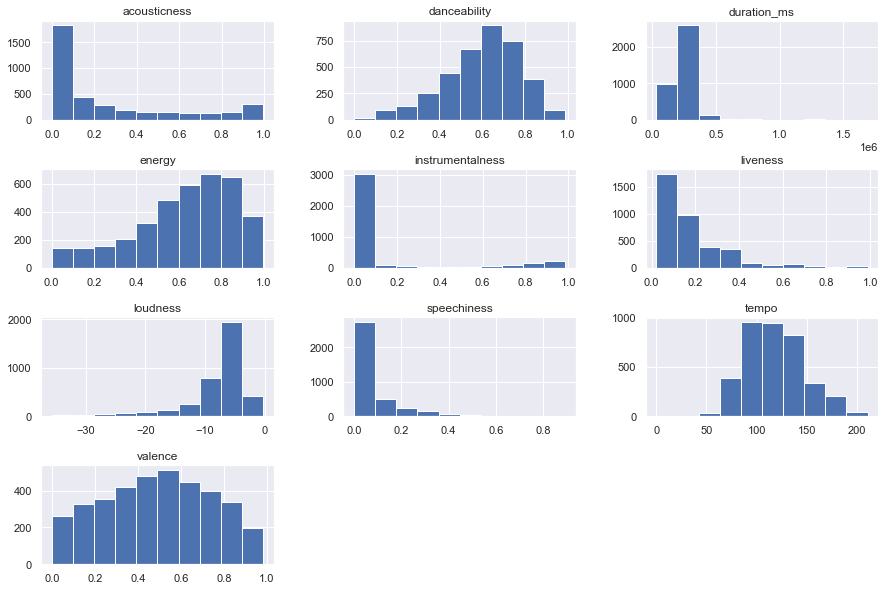

In [37]:
# let's look at the distribution of numeric variables
numeric_df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

It looks like duration_ms and speechiness may have outliers

In [38]:
df.duration_ms.describe()

count    3.726000e+03
mean     2.336513e+05
std      8.745120e+04
min      3.159800e+04
25%      1.953130e+05
50%      2.240800e+05
75%      2.575698e+05
max      1.689627e+06
Name: duration_ms, dtype: float64

In [39]:
df.speechiness.describe()

count    3726.000000
mean        0.089222
std         0.092891
min         0.000000
25%         0.036200
50%         0.049450
75%         0.095875
max         0.894000
Name: speechiness, dtype: float64

In [40]:
# isolate numeric features of X_train and X_test
numeric_df_X_train = X_train.select_dtypes(include=['int', 'float'])
numeric_df_X_test = X_test.select_dtypes(include=['int', 'float'])

In [41]:
X_train['acousticness']

0       0.265000
1       0.621000
2       0.435000
3       0.000041
4       0.148000
          ...   
2975    0.099400
2976    0.238000
2977    0.561000
2978    0.123000
2979    0.048200
Name: acousticness, Length: 2980, dtype: float64

In [42]:
numeric_df_X_train['acousticness']

0       0.265000
1       0.621000
2       0.435000
3       0.000041
4       0.148000
          ...   
2975    0.099400
2976    0.238000
2977    0.561000
2978    0.123000
2979    0.048200
Name: acousticness, Length: 2980, dtype: float64

### Let's first try scaling with MinMax

In [43]:
# scale X_train and X_test
# this should make all values between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# create model, fit, and transform
MM_scaler = MinMaxScaler()
numeric_df_mm_X_train = MM_scaler.fit_transform(numeric_df_X_train)
numeric_df_mm_X_test = MM_scaler.fit_transform(numeric_df_X_test)

# convert back to dataframe for plotting
numeric_df_mm_X_train = pd.DataFrame(numeric_df_mm_X_train)
numeric_df_mm_X_train.columns = numeric_column_names
numeric_df_mm_X_test = pd.DataFrame(numeric_df_mm_X_test)
numeric_df_mm_X_test.columns = numeric_column_names

#numeric_df_mm_X_train
# numeric_df_mm_X_test.hist(figsize=(15,10))
# plt.subplots_adjust(hspace=0.5)

In [44]:
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,Label_Ya Basta,Label_Yellow K,"Label_Young Stoner Life, 300",Label_Zelig,Label_Zooland,Label_bitbird,"Label_dream.hax, Alcopop!",Label_geffen,"Label_will.i.am, A&M",Label_~scape
0,0.265000,0.697,157895.0,0.504,0.039100,0.0927,-6.638,0.0505,95.087,0.325,...,0,0,0,0,0,0,0,0,0,0
1,0.621000,0.728,217707.0,0.563,0.000000,0.1790,-8.053,0.1340,100.017,0.352,...,0,0,0,0,0,0,0,0,0,0
2,0.435000,0.722,185658.0,0.565,0.000000,0.1650,-5.848,0.0335,104.483,0.488,...,0,0,0,0,0,0,0,0,0,0
3,0.000041,0.729,215200.0,0.675,0.001260,0.0867,-5.292,0.0286,125.036,0.740,...,0,0,0,0,0,0,0,0,0,0
4,0.148000,0.710,191025.0,0.605,0.000000,0.0890,-7.163,0.2250,82.994,0.329,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,0.099400,0.791,206067.0,0.590,0.002030,0.0650,-9.206,0.0793,119.951,0.714,...,0,0,0,0,0,0,0,0,0,0
2976,0.238000,0.636,262267.0,0.609,0.000000,0.1320,-7.826,0.0310,97.018,0.605,...,0,0,0,0,0,0,0,0,0,0
2977,0.561000,0.531,177006.0,0.456,0.000104,0.1290,-10.308,0.0336,110.408,0.523,...,0,0,0,0,0,0,0,0,0,0
2978,0.123000,0.510,210664.0,0.760,0.000000,0.1370,-5.947,0.0440,176.053,0.710,...,0,0,0,0,0,0,0,0,0,0


In [45]:
numeric_df_mm_X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.266062,0.685949,0.076173,0.504548,0.039655,0.074070,0.820354,0.037530,0.304003,0.310273
1,0.623493,0.719404,0.112247,0.563841,0.000000,0.163223,0.780398,0.149852,0.333642,0.338574
2,0.436745,0.712929,0.092918,0.565851,0.000000,0.148760,0.842661,0.014662,0.360491,0.481132
3,0.000038,0.720483,0.110735,0.676398,0.001278,0.067872,0.858361,0.008071,0.484053,0.745283
4,0.148592,0.699978,0.096155,0.606050,0.000000,0.070248,0.805529,0.272263,0.231302,0.314465
...,...,...,...,...,...,...,...,...,...,...
2975,0.099796,0.787395,0.105227,0.590975,0.002059,0.045455,0.747840,0.076271,0.453483,0.718029
2976,0.238953,0.620117,0.139122,0.610070,0.000000,0.114669,0.786807,0.011299,0.315612,0.603774
2977,0.563252,0.506799,0.087699,0.456309,0.000105,0.111570,0.716722,0.014797,0.396112,0.517820
2978,0.123491,0.484136,0.107999,0.761821,0.000000,0.119835,0.839866,0.028787,0.790762,0.713836


### Now let's try Standardization

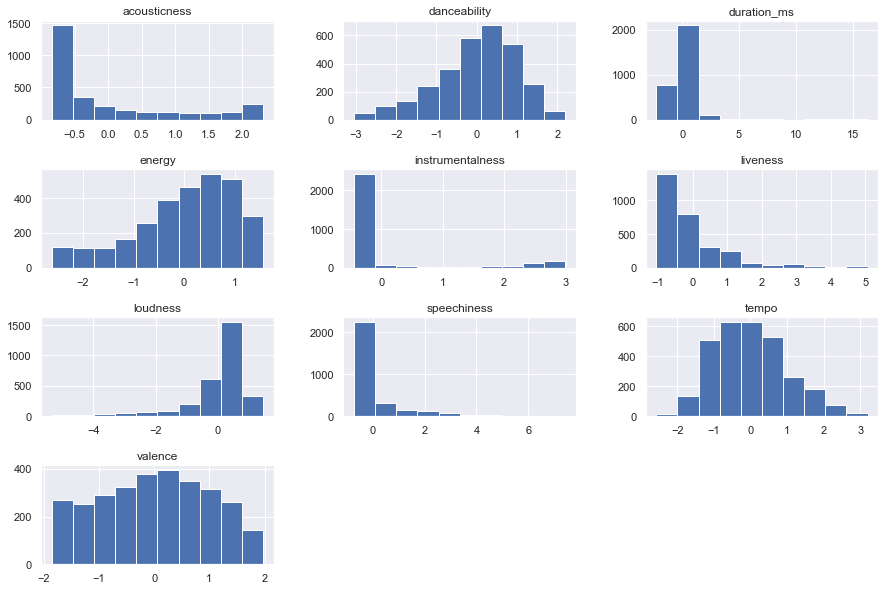

In [46]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# create model, fit, and transform
SS_scaler = StandardScaler()
numeric_df_ss_X_train = SS_scaler.fit_transform(numeric_df_X_train)
numeric_df_ss_X_test = SS_scaler.fit_transform(numeric_df_X_test)

# convert back to dataframe for plotting
numeric_df_ss_X_train = pd.DataFrame(numeric_df_ss_X_train)
numeric_df_ss_X_train.columns = numeric_column_names
numeric_df_ss_X_test = pd.DataFrame(numeric_df_ss_X_test)
numeric_df_ss_X_test.columns = numeric_column_names

numeric_df_ss_X_train.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

### Update numeric column values with the normalized Min-Max values

In [52]:
numeric_df_mm_X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.266062,0.685949,0.076173,0.504548,0.039655,0.074070,0.820354,0.037530,0.304003,0.310273
1,0.623493,0.719404,0.112247,0.563841,0.000000,0.163223,0.780398,0.149852,0.333642,0.338574
2,0.436745,0.712929,0.092918,0.565851,0.000000,0.148760,0.842661,0.014662,0.360491,0.481132
3,0.000038,0.720483,0.110735,0.676398,0.001278,0.067872,0.858361,0.008071,0.484053,0.745283
4,0.148592,0.699978,0.096155,0.606050,0.000000,0.070248,0.805529,0.272263,0.231302,0.314465
...,...,...,...,...,...,...,...,...,...,...
2975,0.099796,0.787395,0.105227,0.590975,0.002059,0.045455,0.747840,0.076271,0.453483,0.718029
2976,0.238953,0.620117,0.139122,0.610070,0.000000,0.114669,0.786807,0.011299,0.315612,0.603774
2977,0.563252,0.506799,0.087699,0.456309,0.000105,0.111570,0.716722,0.014797,0.396112,0.517820
2978,0.123491,0.484136,0.107999,0.761821,0.000000,0.119835,0.839866,0.028787,0.790762,0.713836


In [53]:
# update X_train and X_test to be the normalized Min-Max values
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,Label_Ya Basta,Label_Yellow K,"Label_Young Stoner Life, 300",Label_Zelig,Label_Zooland,Label_bitbird,"Label_dream.hax, Alcopop!",Label_geffen,"Label_will.i.am, A&M",Label_~scape
0,0.265000,0.697,157895.0,0.504,0.039100,0.0927,-6.638,0.0505,95.087,0.325,...,0,0,0,0,0,0,0,0,0,0
1,0.621000,0.728,217707.0,0.563,0.000000,0.1790,-8.053,0.1340,100.017,0.352,...,0,0,0,0,0,0,0,0,0,0
2,0.435000,0.722,185658.0,0.565,0.000000,0.1650,-5.848,0.0335,104.483,0.488,...,0,0,0,0,0,0,0,0,0,0
3,0.000041,0.729,215200.0,0.675,0.001260,0.0867,-5.292,0.0286,125.036,0.740,...,0,0,0,0,0,0,0,0,0,0
4,0.148000,0.710,191025.0,0.605,0.000000,0.0890,-7.163,0.2250,82.994,0.329,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,0.099400,0.791,206067.0,0.590,0.002030,0.0650,-9.206,0.0793,119.951,0.714,...,0,0,0,0,0,0,0,0,0,0
2976,0.238000,0.636,262267.0,0.609,0.000000,0.1320,-7.826,0.0310,97.018,0.605,...,0,0,0,0,0,0,0,0,0,0
2977,0.561000,0.531,177006.0,0.456,0.000104,0.1290,-10.308,0.0336,110.408,0.523,...,0,0,0,0,0,0,0,0,0,0
2978,0.123000,0.510,210664.0,0.760,0.000000,0.1370,-5.947,0.0440,176.053,0.710,...,0,0,0,0,0,0,0,0,0,0


In [54]:
for column_name in numeric_column_names:
    X_train[column_name] = numeric_df_mm_X_train[column_name]

In [55]:
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,Label_Ya Basta,Label_Yellow K,"Label_Young Stoner Life, 300",Label_Zelig,Label_Zooland,Label_bitbird,"Label_dream.hax, Alcopop!",Label_geffen,"Label_will.i.am, A&M",Label_~scape
0,0.266062,0.685949,0.076173,0.504548,0.039655,0.074070,0.820354,0.037530,0.304003,0.310273,...,0,0,0,0,0,0,0,0,0,0
1,0.623493,0.719404,0.112247,0.563841,0.000000,0.163223,0.780398,0.149852,0.333642,0.338574,...,0,0,0,0,0,0,0,0,0,0
2,0.436745,0.712929,0.092918,0.565851,0.000000,0.148760,0.842661,0.014662,0.360491,0.481132,...,0,0,0,0,0,0,0,0,0,0
3,0.000038,0.720483,0.110735,0.676398,0.001278,0.067872,0.858361,0.008071,0.484053,0.745283,...,0,0,0,0,0,0,0,0,0,0
4,0.148592,0.699978,0.096155,0.606050,0.000000,0.070248,0.805529,0.272263,0.231302,0.314465,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,0.099796,0.787395,0.105227,0.590975,0.002059,0.045455,0.747840,0.076271,0.453483,0.718029,...,0,0,0,0,0,0,0,0,0,0
2976,0.238953,0.620117,0.139122,0.610070,0.000000,0.114669,0.786807,0.011299,0.315612,0.603774,...,0,0,0,0,0,0,0,0,0,0
2977,0.563252,0.506799,0.087699,0.456309,0.000105,0.111570,0.716722,0.014797,0.396112,0.517820,...,0,0,0,0,0,0,0,0,0,0
2978,0.123491,0.484136,0.107999,0.761821,0.000000,0.119835,0.839866,0.028787,0.790762,0.713836,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X_test

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,Label_Ya Basta,Label_Yellow K,"Label_Young Stoner Life, 300",Label_Zelig,Label_Zooland,Label_bitbird,"Label_dream.hax, Alcopop!",Label_geffen,"Label_will.i.am, A&M",Label_~scape
0,0.414000,0.798,164000.0,0.620,0.019200,0.1120,-7.079,0.2320,120.031,0.235,...,0,0,0,0,0,0,0,0,0,0
1,0.005640,0.682,192440.0,0.889,0.000000,0.3600,-4.166,0.0804,138.021,0.827,...,0,0,0,0,0,0,0,0,0,0
2,0.025900,0.792,207587.0,0.589,0.000128,0.1140,-6.869,0.2620,157.147,0.778,...,0,0,0,0,0,0,0,0,0,0
3,0.047500,0.447,223093.0,0.978,0.000002,0.8420,-3.374,0.1270,120.592,0.223,...,0,0,0,0,0,0,0,0,0,0
4,0.000155,0.779,246960.0,0.640,0.000770,0.1010,-8.415,0.1590,99.019,0.498,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,0.568000,0.643,271840.0,0.602,0.000000,0.0503,-6.633,0.2330,120.153,0.448,...,0,0,0,0,0,0,0,0,0,0
742,0.070200,0.554,220440.0,0.666,0.005930,0.1060,-7.414,0.0747,140.056,0.472,...,0,0,0,0,0,0,0,0,0,0
743,0.981000,0.377,262590.0,0.216,0.134000,0.9670,-14.682,0.0422,152.113,0.172,...,0,0,0,0,0,0,0,0,0,0
744,0.222000,0.884,191368.0,0.826,0.000002,0.0651,-3.672,0.0853,94.997,0.465,...,0,0,0,0,0,0,0,0,0,0


In [57]:
numeric_df_mm_X_test

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.415651,0.827801,0.096475,0.623962,0.019492,0.095717,0.802912,0.259508,0.571130,0.241521
1,0.005643,0.707469,0.120839,0.895153,0.000000,0.358012,0.888588,0.089933,0.656730,0.849949
2,0.025985,0.821577,0.133815,0.592709,0.000130,0.097832,0.809088,0.293065,0.747735,0.799589
3,0.047672,0.463693,0.147098,0.984878,0.000002,0.867795,0.911882,0.142058,0.573800,0.229188
4,0.000136,0.808091,0.167544,0.644125,0.000782,0.084082,0.763618,0.177852,0.471151,0.511819
...,...,...,...,...,...,...,...,...,...,...
741,0.570273,0.667012,0.188858,0.605815,0.000000,0.030460,0.816029,0.260626,0.571711,0.460432
742,0.070464,0.574689,0.144825,0.670336,0.006020,0.089371,0.793059,0.083557,0.666413,0.485098
743,0.984939,0.391079,0.180934,0.216671,0.136041,1.000000,0.579294,0.047204,0.723782,0.176773
744,0.222877,0.917012,0.119920,0.831640,0.000002,0.046113,0.903118,0.095414,0.452014,0.477903


In [58]:
for column_name in numeric_column_names:
    X_test[column_name] = numeric_df_mm_X_test[column_name]

In [59]:
X_test

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,Label_Ya Basta,Label_Yellow K,"Label_Young Stoner Life, 300",Label_Zelig,Label_Zooland,Label_bitbird,"Label_dream.hax, Alcopop!",Label_geffen,"Label_will.i.am, A&M",Label_~scape
0,0.415651,0.827801,0.096475,0.623962,0.019492,0.095717,0.802912,0.259508,0.571130,0.241521,...,0,0,0,0,0,0,0,0,0,0
1,0.005643,0.707469,0.120839,0.895153,0.000000,0.358012,0.888588,0.089933,0.656730,0.849949,...,0,0,0,0,0,0,0,0,0,0
2,0.025985,0.821577,0.133815,0.592709,0.000130,0.097832,0.809088,0.293065,0.747735,0.799589,...,0,0,0,0,0,0,0,0,0,0
3,0.047672,0.463693,0.147098,0.984878,0.000002,0.867795,0.911882,0.142058,0.573800,0.229188,...,0,0,0,0,0,0,0,0,0,0
4,0.000136,0.808091,0.167544,0.644125,0.000782,0.084082,0.763618,0.177852,0.471151,0.511819,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,0.570273,0.667012,0.188858,0.605815,0.000000,0.030460,0.816029,0.260626,0.571711,0.460432,...,0,0,0,0,0,0,0,0,0,0
742,0.070464,0.574689,0.144825,0.670336,0.006020,0.089371,0.793059,0.083557,0.666413,0.485098,...,0,0,0,0,0,0,0,0,0,0
743,0.984939,0.391079,0.180934,0.216671,0.136041,1.000000,0.579294,0.047204,0.723782,0.176773,...,0,0,0,0,0,0,0,0,0,0
744,0.222877,0.917012,0.119920,0.831640,0.000002,0.046113,0.903118,0.095414,0.452014,0.477903,...,0,0,0,0,0,0,0,0,0,0


#### write to CSV
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/df_data_scaled.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)

#### write to CSV
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/X_train.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_train.to_csv(filepath)

from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/X_test.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_test.to_csv(filepath)

from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/y_train.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
y_train.to_csv(filepath)

from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/y_test.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
y_test.to_csv(filepath)

#### write to parquet
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/df_data_scaled_pq.parquet')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_parquet(filepath, 
              engine = "pyarrow", 
              compression = None)

df = pd.read_parquet('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/df_data_scaled_pq.parquet')